Saving 10. Market Basket Analysis.csv to 10. Market Basket Analysis (3).csv
Top 5 Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
7,(milk),(red wines),0.174,0.232,0.064,0.367816,1.585414,1.0,0.023632,1.214836,0.447034,0.187135,0.176844,0.321839
3,(dish detergents),(cat food care),0.190,0.214,0.066,0.347368,1.623217,1.0,0.025340,1.204355,0.473999,0.195266,0.169680,0.327890
0,(milk),(air fresheners candles),0.174,0.218,0.058,0.333333,1.529052,1.0,0.020068,1.173000,0.418886,0.173653,0.147485,0.299694
6,(marinades meat preparation),(red wines),0.204,0.232,0.066,0.323529,1.394523,1.0,0.018672,1.135304,0.355413,0.178378,0.119179,0.304006
2,(marinades meat preparation),(baby bath body care),0.204,0.206,0.064,0.313725,1.522939,1.0,0.021976,1.156971,0.431376,0.184971,0.135674,0.312203


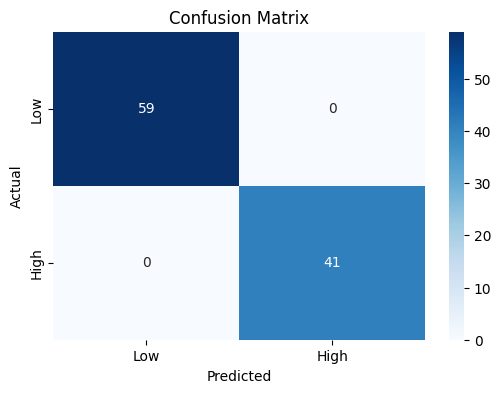

Accuracy: 1.00
Precision: 1.00
Recall: 1.00


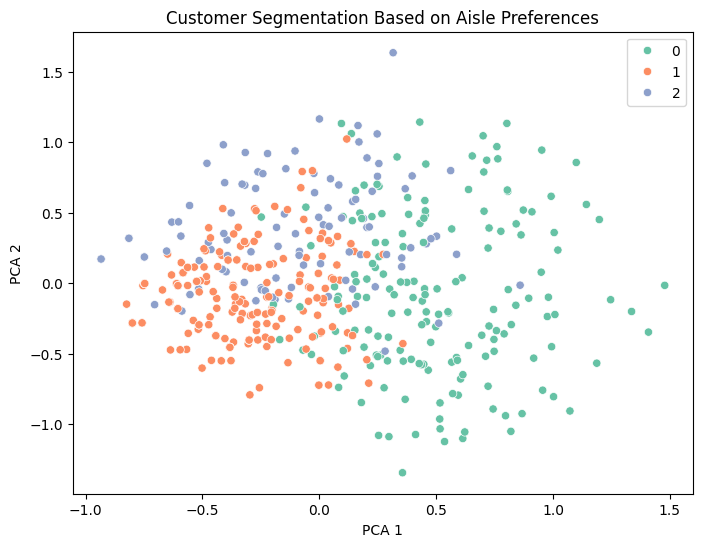

In [3]:
#  STEP 1: Load and Simulate Transaction Data
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()  # Upload your "10. Market Basket Analysis.csv"

df_aisles = pd.read_csv("10. Market Basket Analysis.csv")
aisles = df_aisles['aisle'].sample(20, random_state=42).tolist()

transactions = []
customer_labels = []

np.random.seed(42)
for _ in range(500):
    num_items = np.random.randint(1, 8)
    items = random.sample(aisles, num_items)
    transactions.append(items)
    customer_labels.append(1 if num_items > 4 else 0)  # High spender if more than 4 items

#  STEP 2: Association Rule Mining (Apriori)
!pip install mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_trans = pd.DataFrame(te_array, columns=te.columns_)

frequent_itemsets = apriori(df_trans, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

print("Top 5 Association Rules:")
display(rules.sort_values(by='confidence', ascending=False).head())

#  STEP 3: Classification (High vs. Low Spender)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

X = np.array([len(t) for t in transactions]).reshape(-1, 1)
y = np.array(customer_labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "High"], yticklabels=["Low", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")

#  STEP 4: Clustering and Customer Segmentation
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

item_df = pd.DataFrame(te_array.astype(int), columns=te.columns_)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(item_df)

reduced = PCA(n_components=2).fit_transform(item_df)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=clusters, palette="Set2")
plt.title("Customer Segmentation Based on Aisle Preferences")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()
